In [1]:
import matplotlib.pyplot as plt
import numpy as np
from train_admin import *

In [2]:
model = ModelWrapper(real_vars=10,
                     latent_vars=5,
                     ode_width = 128,
                     ode_hidden = 5,
                     tanh_reg = True,
                     coder_hidden = 4,
                     width_list = [32, 16, 8],
                     coder_activation=torch.nn.ReLU()).to(DEVICE)
t_range = torch.linspace(0, 1, 16).to(DEVICE)
dataloader = DataLoader(LorenzoDatasetSmall(), shuffle=True)

In [3]:
model.load_state_dict(torch.load("/export/data/isulzer/mldata/pytorch_implemetation/models/model_32.pt"))

<All keys matched successfully>

In [4]:
with torch.no_grad():
    model.eval()
    x0, x_true = next(iter(dataloader))
    x_pred = model(x0, t_range).cpu().numpy()
    x_true = x_true.cpu().numpy()

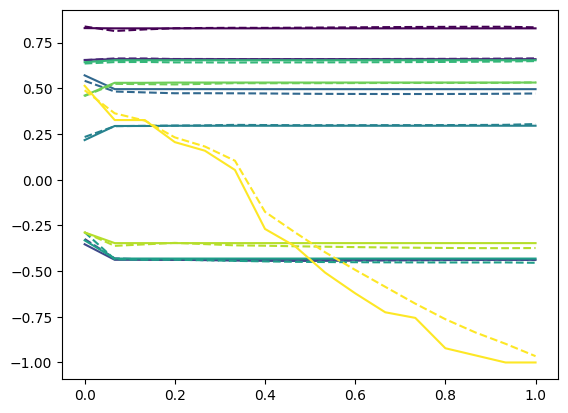

In [5]:
%matplotlib inline
t = np.linspace(0, 1, 16)
colors = plt.cm.viridis(np.linspace(0, 1, 10))
for i in range(10):
    plt.plot(t, x_true[0, :, i], color=colors[i])
    plt.plot(t, x_pred[0, :, i], linestyle="--", color=colors[i])

In [8]:
model.ode.reg_factor

Parameter containing:
tensor([1.1081], device='cuda:1', requires_grad=True)